<a href="https://colab.research.google.com/github/sdavarzani/Image-Formation/blob/main/IMG_Formation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rotation**

In [ ]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
# Accessing the Google Drive
from google.colab import drive
drive.mount('/content/drive')
img_path="/content/pirooz.jpg"  # Location of the image on my Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


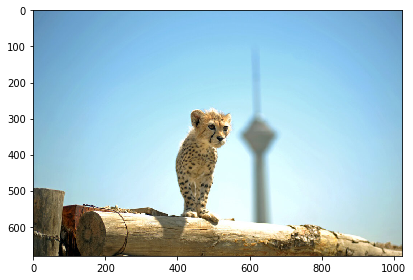

In [ ]:
# Demonstraion of the image
from skimage import io
img = io.imread(img_path)
io.imshow(img)

In [ ]:
# Function for the  rotation the image around its center
def image_rotateion (image, degree):

    # First we will convert the degrees into radians
    angle = math.radians(degree) # Converting degrees to radians

    # The height and width of the rotated image
    height_rotated_img = round(abs(image.shape[0]*math.cos(angle))) + \
                       round(abs(image.shape[1]*math.sin(angle)))
    width_rotated_img = round(abs(image.shape[1]*math.cos(angle))) + \
                       round(abs(image.shape[0]*math.sin(angle)))

    rotated_img = np.uint8(np.zeros(( height_rotated_img,width_rotated_img,image.shape[2])))

    # The center point of the original image
    cx, cy = (image.shape[1]//2, image.shape[0]//2)

    # The center point of the rotated image.
    midx,midy = (width_rotated_img//2,width_rotated_img//2)

    for i in range(rotated_img.shape[0]):
        for j in range(rotated_img.shape[1]):
            x= (i-midx)*math.cos(angle)+(j-midy)*math.sin(angle)
            y= -(i-midx)*math.sin(angle)+(j-midy)*math.cos(angle)

            x=round(x)+cy
            y=round(y)+cx

            if (x>=0 and y>=0 and x<image.shape[0] and  y<image.shape[1]):
                 rotated_img[i,j,:] = image[x,y,:]

    return  rotated_img

In [ ]:
print(img.shape)

(681, 1024, 3)


Text(0.5, 1.0, 'Rotation (-45 degree)')

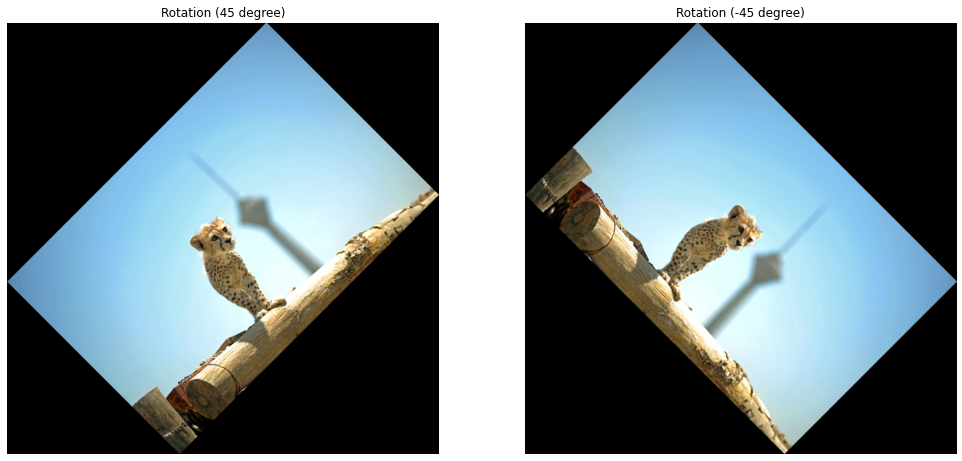

In [ ]:
# Specified angels for rotation
rotated_image1 = image_rotateion(img,45)
rotated_image2 = image_rotateion(img,-45)
# showing the rotated images
fig = plt.figure(figsize=(17, 12))

# setting values to rows and column variables
rows = 1
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(rotated_image1)
plt.axis('off')
plt.title("Rotation (45 degree)")

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(rotated_image2)
plt.axis('off')
plt.title("Rotation (-45 degree)")

 **Translation**

Text(0.5, 1.0, 'Translated Image ')

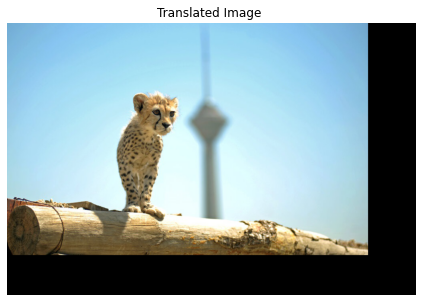

In [ ]:
trans_img= np.zeros_like(img)
trans_img[:-100,:-120] = img[100:,120:]
# showing image
fig = plt.figure(figsize=(10, 5))
plt.imshow(trans_img)
plt.axis('off')
plt.title("Translated Image ")

 # **Open CV**

In [ ]:
# Importing open CV libraries
import cv2
from google.colab.patches import cv2_imshow

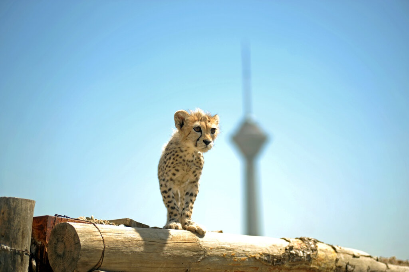

-1

In [ ]:
# Reading an image in default mode
img_OC = cv2.imread(img_path)
# Resize image
scale_percent = 40 # percent of original size
width = int(img_OC.shape[1] * scale_percent / 100)
height = int(img_OC.shape[0] * scale_percent / 100)
dim = (width, height)
resized=cv2.resize(img_OC,dim)
# Showing image
cv2_imshow(resized)
cv2.waitKey(0)

In [ ]:
# Height and width of the image
height, width = img_OC.shape[:2]
# Center coordinates of the image (create the 2D rotation matrix)
center = (width/2, height/2)

 # Calculation of the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=45, scale=1)


# rotation calculates the cos and sin, taking absolutes of those.
abs_cos = abs(rotate_matrix[0,0])
abs_sin = abs(rotate_matrix[0,1])

# Width and height of the roated image
bound_w = int((height * abs_sin) + (width * abs_cos))
bound_h = int((height * abs_cos) + (width * abs_sin))

# Subtract old image center and adding the new image center coordinates
rotate_matrix[0, 2] += bound_w/2 - center[0]
rotate_matrix[1, 2] += bound_h/2 - center[1]
# Rotate image with the new bounds and translated rotation matrix
rotated_image_CV = cv2.warpAffine(img_OC, rotate_matrix, (bound_w, bound_h))

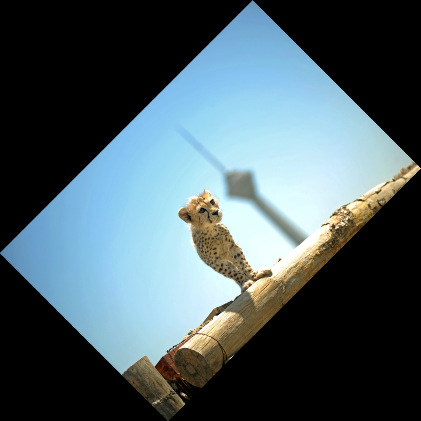

-1

In [ ]:
# Resize rotated image
scale_percent = 35 # percent of original size
width1 = int(rotated_image_CV .shape[1] * scale_percent / 100)
height1 = int(rotated_image_CV .shape[0] * scale_percent / 100)
# Display the image
dim1 = (width1, height1)
resized2=cv2.resize(rotated_image_CV,dim1)
cv2_imshow(resized2 )
cv2.waitKey(0)

**Translation**

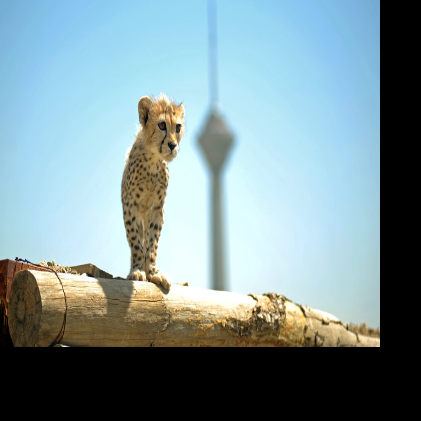

-1

In [ ]:
# load the image and display it to our screen
# shift the image 25 pixels to the right and 50 pixels down "Shifted Down and Right",
M = np.float32([[1, 0, -100], [0, 1, -120]])
shifted_img = cv2.warpAffine(img_OC, M, (img_OC.shape[1], img_OC.shape[0]))
# Resize the image
scale_percent = 35 # percent of original size
width2 = int(shifted_img .shape[1] * scale_percent / 100)
height2 = int(shifted_img .shape[0] * scale_percent / 100)
# Display the image
dim2 = (width2, height2)
resized3=cv2.resize(shifted_img,dim1)
cv2_imshow(resized3 )
cv2.waitKey(0)


**Comparison**

In [ ]:
print("skimage shape: ",img.shape)
print("cv2 shape: ",img_OC.shape)
print("Rotated image from scrach: ",rotated_image1.shape)
print("Rotated image using Open CV: ",rotated_image_CV.shape)

skimage shape:  (681, 1024, 3)
cv2 shape:  (681, 1024, 3)
Rotated image from scrach:  (1206, 1206, 3)
Rotated image using Open CV:  (1205, 1205, 3)
